# Iris Species Classification with Artificial Neural Networks
In this project, we'll use the Iris dataset to create an Artificial Neural Network (ANN). A traditional classification job, the Iris dataset contains measurements of three different species of iris blossoms and is a frequently used benchmark dataset in machine learning. The objective is to construct an ANN that can successfully categorize iris flowers according to their petal and sepal features. To do this, we'll create and train the neural network using tools like TensorFlow or Keras. This ANN will undergo training on a portion of the dataset, allowing it to learn patterns and relationships between the input features and the corresponding iris species labels. Once trained, the ANN will be capable of predicting the species of iris flowers with high accuracy based on new data. This project serves as a practical example of applying deep learning techniques to real-world data for classification purposes.

<div class="alert alert-block alert-danger">
<b>Package version :</b>
    <ol>
    <li>Tensorflow 2.4.1</li>
    <li>Keras 2.4.3</li>
    <li>Matplotlib 3.5.0</li>
    <li>Scikit-learn 0.23.2</li>
    </ol>
</div>

We load the Iris dataset using the sklearn library, which provides convenient access to the dataset. The dataset is divided into two main components: the input features (X) and the target labels (y). The input features, denoted as 'X,' include measurements of petal length, petal width, sepal length, and sepal width for each iris sample. Meanwhile, the target labels, labeled as 'y,' represent the corresponding species of each iris flower, encoded as integers.

In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

iris = datasets.load_iris()

X = iris.data
y = iris.target

In [ ]:
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [ ]:
print(iris)

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

The provided code snippet illustrates a common procedure in machine learning known as data splitting, with the goal of preparing the dataset for model development and evaluation. Firstly, the dataset, consisting of features (X) and corresponding labels (y), is divided into two main subsets: a training set and a testing set. Approximately 10% of the data is allocated for testing, while the remaining 90% is designated for training. Subsequently, a secondary data split occurs within the training dataset, creating a validation set. Approximately 15% of the training data is reserved for validation, while the majority, approximately 85%, remains for actual model training. Lastly, the code provides transparency by printing the dimensions (shapes) of the resulting datasets, including X_train, X_val, and X_test, enabling users to verify that the data has been divided correctly. This systematic data splitting process is essential for robust model development, hyperparameter tuning, and assessing model generalization, ultimately contributing to the reliable evaluation of machine learning models.

In [ ]:
# Splitting the Data into Training, Validation, and Testing Sets

# Splitting the data into training (X_train, Y_train) and testing (X_test, Y_test) sets with a test size of 10%.
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=.10)

# Further splitting the training data into training (X_train) and validation (X_val) sets with a validation size of 15%.
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=.15)

# Printing the shapes of the resulting datasets.
print('X_train', X_train.shape)
print('X_val', X_val.shape)
print('X_test', X_test.shape)

X_train (114, 4)
X_val (21, 4)
X_test (15, 4)


## Multi-Layer Perceptron (MLP) classifier

This code segment aims to create a Multi-Layer Perceptron (MLP) classifier using scikit-learn's machine learning library. An MLP is a type of artificial neural network used for classification tasks, and in this case, it will be configured with specific settings to suit the problem at hand. The code begins by importing the necessary components from scikit-learn. Specifically, it imports the MLPClassifier class from the neural network module, highlighting the utilization of machine learning tools for creating and configuring neural network classifiers.

Once the MLPClassifier class is imported, an instance of this classifier is instantiated and assigned to the variable mlp. This instance will serve as the neural network model for a classification task. The settings for this model are specified within the instantiation, including the architecture, activation function, and training parameters.

The architecture is defined with a single hidden layer consisting of 64 neurons, and the activation function for these neurons is set to ReLU (Rectified Linear Unit). The choice of architecture and activation function significantly influences the model's capacity to capture complex patterns in the data. Furthermore, the model's training process is constrained to a maximum of 1000 iterations or epochs, and a small positive value (epsilon) is introduced to ensure numerical stability during training. These parameters are essential for controlling the learning process and optimizing the model's performance.

In [ ]:
# Creating a Multi-Layer Perceptron (MLP) Classifier

# Importing the MLPClassifier class from scikit-learn's neural network module.
from sklearn.neural_network import MLPClassifier

# Creating an instance of the MLPClassifier class with specific settings.
mlp = MLPClassifier(hidden_layer_sizes=(64, ), activation='relu', max_iter=1000, epsilon=1e-08)

Now that the MLP classifier has been trained using the training data (X_train and Y_train), our attention is on evaluating its performance by making predictions using the validation data (X_val). We will specifically use the accuracy_score measure to determine and report the model's prediction accuracy on the validation set. This accuracy score helps us assess the MLP classifier's generalization and prediction accuracy by showing how well it performs on previously unexplored data.

In [ ]:
# Importing the necessary scikit-learn module for accuracy calculation.
from sklearn.metrics import accuracy_score

# Training the MLP Classifier
mlp.fit(X_train, Y_train)

# Making predictions on the validation data.
prediksi_val = mlp.predict(X_val)

# Calculating the accuracy of the model's predictions on the validation set.
acc_val = accuracy_score(Y_val, prediksi_val)

# Printing the accuracy score of the model on the validation data.
print('Validation Accuracy of the ANN Classifier:', acc_val)

Akurasi Validasi Training ANN: 1.0


The next step involves using the MLP classifier to make predictions and then measuring its accuracy.

In [ ]:
# Making predictions on the testing dataset using the trained MLP classifier.
prediksi_test = mlp.predict(X_test)

# Calculating the accuracy score by comparing the true labels (Y_test) with the predicted labels (prediksi_test).
acc_test = accuracy_score(Y_test, prediksi_test)

# Printing the accuracy score for the testing dataset.
print('Akurasi Testing ANN:', acc_test)


Akurasi Testing ANN: 0.9333333333333333


An accuracy score of 93.33% suggests that the MLP classifier was able to accurately classify the Iris dataset's samples into their respective classes with a high level of precision during testing. This demonstrates the effectiveness of the trained neural network model in making accurate predictions on new, unseen data, and it is a positive outcome in the context of the classification task using the Iris dataset.

Certainly, let's provide a more detailed explanation of the next step, which involves importing necessary libraries and calculating additional metrics:

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Akurasi Testing ANN: 0.9333333333333333


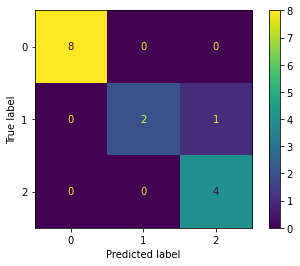

In [ ]:
# Importing the accuracy_score and plot_confusion_matrix functions from scikit-learn's metrics module.
from sklearn.metrics import accuracy_score, plot_confusion_matrix

# Making predictions using the trained MLP classifier on the testing dataset.
prediksi = mlp.predict(X_test)

# Plotting the confusion matrix to visually assess the classifier's performance.
plot_confusion_matrix(mlp, X_test, Y_test)

# Calculating the accuracy score based on the true labels (Y_test) and predicted labels (prediksi).
accuracy = accuracy_score(Y_test, prediksi)

### Converting Labels to Categorical One-Hot Encoding

Categorical one-hot encoding is a fundamental data transformation technique, particularly valuable in machine learning, specifically when dealing with categorical or nominal data, such as class labels. This technique is employed to convert categorical data into a numerical format suitable for machine learning models, including neural networks. Here's an in-depth explanation of its principles and significance:

**Example of Categorical One-Hot Encoding:**
Consider a dataset with a 'Color' feature containing categories 'Red,' 'Green,' and 'Blue.' Using one-hot encoding:
'Red' may be represented as [1, 0, 0]
'Green' may be represented as [0, 1, 0]
'Blue' may be represented as [0, 0, 1]

In [ ]:
# Importing the to_categorical function from TensorFlow's Keras utilities.
from tensorflow.keras.utils import to_categorical

# Converting training set labels (Y_train) to categorical one-hot encoding.
Y_train = to_categorical(Y_train, 3)

# Converting validation set labels (Y_val) to categorical one-hot encoding.
Y_val = to_categorical(Y_val, 3)

# Converting testing set labels (Y_test) to categorical one-hot encoding.
Y_test = to_categorical(Y_test, 3)

## Creating a Sequential Neural Network Model

In this section, we'll provide a comprehensive explanation of the code responsible for creating a Sequential Neural Network model using Keras. This code serves as the foundation for building and training a neural network for classification tasks. The code starts by importing essential modules from Keras. Keras is a high-level neural networks API that simplifies the process of building and training neural networks.



In [ ]:
# Importing necessary modules from Keras.
from keras.models import Sequential
from keras.layers import Flatten, Dense

# Creating an instance of the Sequential model.
model = Sequential()

# Adding Layers to the Sequential Model
model.add(Flatten())           # Flatten layer: Flattens input data.
model.add(Dense(64, activation='relu'))  # Dense layer with 64 neurons and ReLU activation.
model.add(Dense(3, activation='softmax'))  # Dense layer with 3 neurons (output classes) and softmax activation.

# Compiling the Model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])

 This code establishes a Sequential Neural Network model with specified layers and configurations, making it ready for training and evaluation. The network architecture is crucial in determining how the model learns and predicts, and the compilation settings guide the training process. This structured approach simplifies the development of neural networks for various machine learning tasks.

 Certainly, let's explain the next step in building and training a neural network model using Keras:

In [ ]:
# Fitting the model to the training data
model.fit(X_train,Y_train,epochs=100,batch_size=10,validation_data=(X_val,Y_val))

Epoch 1/100
12/12 [==============================] - 1s 35ms/step - loss: 1.7284 - acc: 0.3000 - val_loss: 0.8984 - val_acc: 0.5714
Epoch 2/100
12/12 [==============================] - 0s 2ms/step - loss: 0.8493 - acc: 0.6154 - val_loss: 0.8074 - val_acc: 0.5238
Epoch 3/100
12/12 [==============================] - 0s 2ms/step - loss: 0.7546 - acc: 0.6968 - val_loss: 0.8764 - val_acc: 0.5238
Epoch 4/100
12/12 [==============================] - 0s 2ms/step - loss: 0.7290 - acc: 0.6992 - val_loss: 0.8060 - val_acc: 0.5238
Epoch 5/100
12/12 [==============================] - 0s 2ms/step - loss: 0.6956 - acc: 0.6724 - val_loss: 0.7255 - val_acc: 0.5238
Epoch 6/100
12/12 [==============================] - 0s 2ms/step - loss: 0.6398 - acc: 0.7069 - val_loss: 0.6839 - val_acc: 0.7143
Epoch 7/100
12/12 [==============================] - 0s 2ms/step - loss: 0.6186 - acc: 0.7019 - val_loss: 0.6765 - val_acc: 0.5238
Epoch 8/100
12/12 [==============================] - 0s 2ms/step - loss: 0.5632 - 

Certainly, let's explain the next step, which involves displaying the model summary using model.summary():

In [ ]:
# Displaying the Model Summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 4)                 0         
_________________________________________________________________
dense (Dense)                (None, 64)                320       
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 195       
Total params: 515
Trainable params: 515
Non-trainable params: 0
_________________________________________________________________


The output summary concludes with a tally of parameters:


1.   **Total trainable parameters:** The sum of trainable parameters across all layers amounts to 515. This figure indicates the total number of parameters that the model will adjust and fine-tune during the training process.
2.   **Trainable parameters:** In this instance, all parameters are trainable, which means that they will be updated during training. Some models may have non-trainable parameters, particularly in scenarios where certain layers are intentionally frozen.
3.   **Non-trainable parameters:** The count of non-trainable parameters is denoted as 0 in this summary. Non-trainable parameters are typically encountered when layers are frozen, such as in pre-trained models where specific layers remain fixed.

This model summary provides a comprehensive overview of the neural network's architecture, highlighting the types of layers employed, their output shapes, and the quantity of parameters associated with each layer. This information is invaluable for comprehending the model's structure, complexity, and its capacity to learn from data during the training process.

## valuating the Model (Detailed Explanation):
Certainly, let's explain the next steps in evaluating the neural network model:

In [ ]:
# Importing Necessary Libraries for Evaluation
from sklearn.metrics import confusion_matrix

# Evaluating the Model
loss, accuracy = model.evaluate(X_test, Y_test)
print('Akurasi Testing ANN:', accuracy)

1/1 [==============================] - 0s 10ms/step - loss: 0.0651 - acc: 1.0000
Akurasi Testing ANN: 1.0


The provided output represents the evaluation results of a neural network model on a test dataset. It begins by importing the necessary library function for later use. The actual evaluation occurs in the following line, where the model is tested on the test dataset. This evaluation process computes two key metrics: the loss and accuracy of the model.

The 'loss' value, calculated to be 0.0651, measures how closely the model's predictions align with the accurate labels in the test dataset. A lower loss typically indicates better alignment, although the specific interpretation depends on the chosen loss function during model training.

The 'accuracy' score is an essential metric for classification tasks, and in this case, it reaches a perfect score of 1.0. An accuracy of 1.0 signifies that the model correctly classified every sample in the test dataset, reflecting its remarkable performance in making predictions.

Before displaying the accuracy score, the output includes additional information from Keras, such as the number of batches processed and the time taken per step during evaluation. However, the central focus remains on the accuracy score, which confirms that the model excels in classifying test data, indicating its ability to generalize effectively to previously unseen examples.